# Test Normal model implementation

In [1]:
import numpy as np
import pandas as pd
from option_models import bsm
from option_models import basket
from option_models import basket_Levy
from matplotlib import pyplot as plt

In [10]:
### only run this when you changed the class definition
import imp
imp.reload(basket)

<module 'option_models.basket' from 'C:\\Users\\Jeremy\\Documents\\GitHub\\Project-team_asap\\option_models\\basket.py'>

weights: [1 0 0 0]
cor_m: 
 [[ 1.   0.2  0.2  0.2]
 [ 0.2  1.   0.2  0.2]
 [ 0.2  0.2  1.   0.2]
 [ 0.2  0.2  0.2  1. ]]
              bsm       levy         mc           gap
strike                                               
80      21.185930  21.185930  21.521162 -8.526513e-14
81      20.348379  20.348379  20.054464 -4.263256e-14
82      19.526455  19.526455  19.715506 -4.263256e-14
83      18.720866  18.720866  18.428644 -4.263256e-14
84      17.932279  17.932279  17.890798 -5.684342e-14
85      17.161318  17.161318  16.875404 -5.684342e-14
86      16.408558  16.408558  16.429197 -5.684342e-14
87      15.674521  15.674521  15.407437 -5.684342e-14
88      14.959672  14.959672  14.826654 -6.394885e-14
89      14.264418  14.264418  14.114405 -5.684342e-14
90      13.589108  13.589108  13.387491 -6.394885e-14
91      12.934027  12.934027  12.749615 -8.526513e-14
92      12.299398  12.299398  12.296701 -5.684342e-14
93      11.685384  11.685384  11.926063 -7.815970e-14
94      11.0920

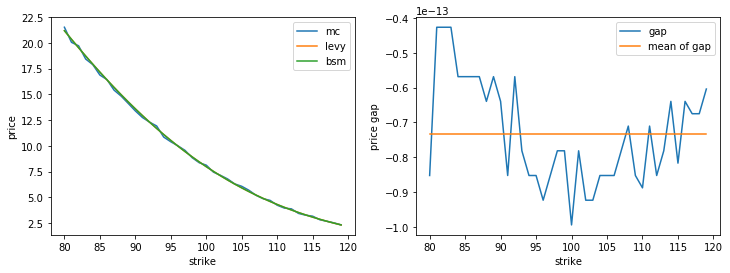

In [2]:
# A trivial test case 1: 
# one asset have 100% weight (the others zero)
# the case should be equivalent to the BSM or Normal model price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.2
weights = np.array([1, 0, 0, 0])
divr = np.zeros(4)
intr = 0
cor_m = 0.8*np.identity(4) + 0.2*np.ones((4,4))
texp = 1
print('weights:',weights);print('cor_m: \n',cor_m)

basket1 = basket_Levy.Basket(vol, weights, cor_m, divr)

strikeRange = np.arange(80,120,1)
bsmList=[]
mcList=[]
levyList=[]

for strike in strikeRange:
    bsmList.append(bsm.bsm_price(strike, spot[0], vol[0], texp, intr, divr[0], cp_sign=1))
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket1.price_Levy(strike, spot, texp, intr))

priceFrm=pd.DataFrame({'mc':mcList,'levy':levyList,'bsm':bsmList},index=strikeRange)
priceFrm['gap']=priceFrm['levy']-priceFrm['bsm']
priceFrm.index.name='strike'
print (priceFrm)

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(strikeRange,mcList,label='mc')
ax1.plot(strikeRange,levyList,label='levy')
ax1.plot(strikeRange,bsmList,label='bsm')
ax2.plot(strikeRange,priceFrm.gap,label='gap')
ax2.plot(strikeRange,[np.mean(priceFrm.gap)]*len(strikeRange),label='mean of gap')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax1.set_ylabel('price')
ax2.set_ylabel('price gap')
plt.show()

weights: [ 0.25  0.25  0.25  0.25]
cor_m: 
 [[ 1.      0.9999  0.9999  0.9999]
 [ 0.9999  1.      0.9999  0.9999]
 [ 0.9999  0.9999  1.      0.9999]
 [ 0.9999  0.9999  0.9999  1.    ]]
             levy         mc       gap
strike                                
80      21.185787  21.013047  0.172740
81      20.348226  20.719565 -0.371340
82      19.526291  19.789227 -0.262936
83      18.720690  18.363874  0.356816
84      17.932092  17.929845  0.002247
85      17.161121  17.107493  0.053628
86      16.408350  16.230461  0.177890
87      15.674303  15.901588 -0.227285
88      14.959444  14.968347 -0.008903
89      14.264181  14.087182  0.177000
90      13.588862  13.526063  0.062799
91      12.933772  12.945366 -0.011594
92      12.299136  12.133454  0.165682
93      11.685115  11.698414 -0.013299
94      11.091810  10.899914  0.191896
95      10.519260  10.695562 -0.176301
96       9.967449  10.005196 -0.037748
97       9.436299   9.451466 -0.015167
98       8.925682   9.131088 -0.205

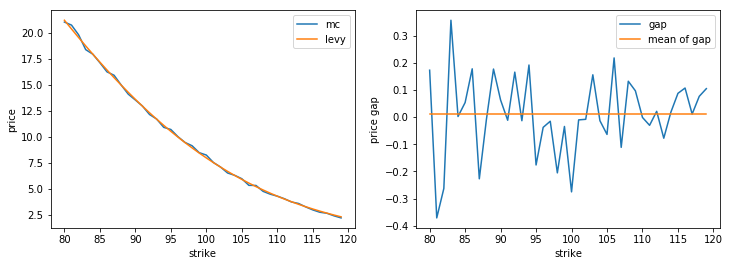

In [3]:
# A trivial test case 2

# all assets almost perfectly correlated:
# the case should be equivalent to the BSM or Normal model price

spot = np.ones(4) * 100
vol = np.ones(4) * 0.2
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.0001*np.identity(4) + 0.9999*np.ones((4,4))
texp = 1

print('weights:',weights);print('cor_m: \n',cor_m)

basket2 = basket_Levy.Basket(vol, weights, cor_m, divr)

strikeRange = np.arange(80,120,1)
mcList=[]
levyList=[]

for strike in strikeRange:
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket2.price_Levy(strike, spot, texp, intr))

priceFrm=pd.DataFrame({'mc':mcList,'levy':levyList},index=strikeRange)
priceFrm['gap']=priceFrm['levy']-priceFrm['mc']
priceFrm.index.name='strike'
print (priceFrm)

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(strikeRange,mcList,label='mc')
ax1.plot(strikeRange,levyList,label='levy')
ax2.plot(strikeRange,priceFrm.gap,label='gap')
ax2.plot(strikeRange,[np.mean(priceFrm.gap)]*len(strikeRange),label='mean of gap')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax1.set_ylabel('price')
ax2.set_ylabel('price gap')
plt.show()

In [4]:
# A test set for basket option
spot = np.ones(4) * 100
vol = np.ones(4) * 0.4
weights = np.ones(4) * 0.25
divr = np.zeros(4)
intr = 0
cor_m = 0.5*np.identity(4) + 0.5*np.ones((4,4))
texp = 5
price = 28.0073695

weights: [ 0.25  0.25  0.25  0.25]
cor_m: 
 [[ 1.   0.5  0.5  0.5]
 [ 0.5  1.   0.5  0.5]
 [ 0.5  0.5  1.   0.5]
 [ 0.5  0.5  0.5  1. ]]
             levy         mc       gap
strike                                
80      36.398241  37.439055 -1.040814
81      35.921035  35.591714  0.329320
82      35.450670  37.648462 -2.197792
83      34.987055  33.604691  1.382364
84      34.530098  34.911144 -0.381045
85      34.079709  34.520118 -0.440409
86      33.635796  35.403527 -1.767731
87      33.198270  32.742541  0.455729
88      32.767041  32.695125  0.071916
89      32.342021  31.080364  1.261658
90      31.923122  32.332913 -0.409791
91      31.510255  31.720161 -0.209906
92      31.103336  30.525682  0.577654
93      30.702278  31.559408 -0.857130
94      30.306996  30.546825 -0.239829
95      29.917406  30.325435 -0.408029
96      29.533426  28.527916  1.005510
97      29.154973  30.087412 -0.932439
98      28.781965  28.821167 -0.039202
99      28.414323  28.943741 -0.529418
100  

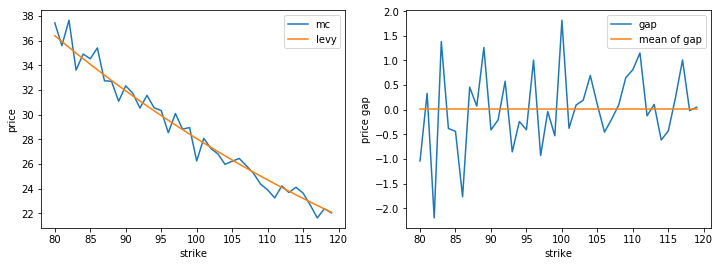

In [5]:
# MC price based on normal model
# make sure that the prices are similar
print('weights:',weights);print('cor_m: \n',cor_m)

basket3 = basket_Levy.Basket(vol, weights, cor_m, divr)

strikeRange = np.arange(80,120,1)
mcList=[]
levyList=[]

for strike in strikeRange:
    mcList.append(basket.basket_price_mc(strike, spot, vol, weights, texp, cor_m, bsm=True))
    levyList.append(basket3.price_Levy(strike, spot, texp, intr))

priceFrm=pd.DataFrame({'mc':mcList,'levy':levyList},index=strikeRange)
priceFrm['gap']=priceFrm['levy']-priceFrm['mc']
priceFrm.index.name='strike'
print (priceFrm)

fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)
ax1.plot(strikeRange,mcList,label='mc')
ax1.plot(strikeRange,levyList,label='levy')
ax2.plot(strikeRange,priceFrm.gap,label='gap')
ax2.plot(strikeRange,[np.mean(priceFrm.gap)]*len(strikeRange),label='mean of gap')
ax1.legend(loc='best')
ax2.legend(loc='best')
ax1.set_xlabel('strike')
ax2.set_xlabel('strike')
ax1.set_ylabel('price')
ax2.set_ylabel('price gap')
plt.show()

#we can see the levy method much less volatile than bsm model when the vol gets higher